<a href="https://colab.research.google.com/github/rodrigorissettoterra/Analise-de-series-temporais/blob/main/An%C3%A1lise_de_series_temporais_(B%C3%A1sico).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucar - Analisando as vendas

##Preparando o ambiente de trabalha

In [ ]:
#Importar biblioteca Pandas
import pandas as pd

In [ ]:
#Carregar a base de dados
alucar = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/alucar.csv')
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


##Informações sobre a base de dados utilizada

In [ ]:
#Imprimindo informações sobre a base de dados
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',alucar.shape[0])
print('O número de colunas é:',alucar.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',alucar.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 24
O número de colunas é: 4

A quantidade de dados nulos na base de dados é de: 3


In [ ]:
#Tipos de dados da base de dados
alucar.dtypes

mes       object
vendas     int64
dtype: object

##Conversão de dados

In [ ]:
#Convertendo mes (object) para data
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes                datetime64[ns]
vendas                      int64
variacao_mensal           float64
aceleracao                float64
dtype: object

##Importando a biblioteca Seaborn e MatPlotLib

In [ ]:
#Caso o seaborn não esteja instalado, executar a linha baixo sem comentário

#!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

##Primeiros gráficos

In [ ]:
#Criando uma função para configurar os gráficos automaticamente
def plotar_grafico_configurado(nome_do_grafico, titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  nome_do_grafico = sns.lineplot(x=x, y=y, data=dataset)
  nome_do_grafico.figure.set_size_inches(12,6)
  nome_do_grafico.set_title(titulo, loc='left', fontsize = 18)
  nome_do_grafico.set_xlabel(labelx, fontsize = 14)
  nome_do_grafico.set_ylabel(labely, fontsize = 14)
  nome_do_grafico = nome_do_grafico

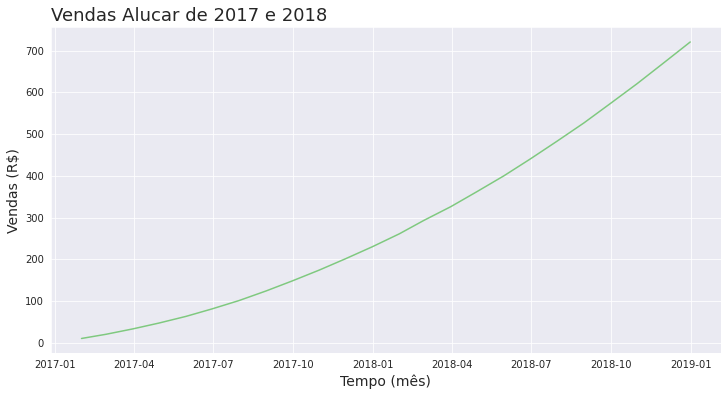

In [ ]:
#Visualizando as vendas de 2017 e 2018
plotar_grafico_configurado(
    'Grafico de vendas (mes)',
    'Vendas Alucar de 2017 e 2018',
    'Tempo (mês)',
    'Vendas (R$)',
    'mes',
    'vendas',
    alucar)

Conforme o tempo passa, a quantidade de vendas está aumentando

#Decompondo as vendas

In [ ]:
#Calculando a variação de vendas mensais
alucar['variacao_mensal'] = alucar['vendas'].diff()
alucar

,mes,vendas,variacao_mensal
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


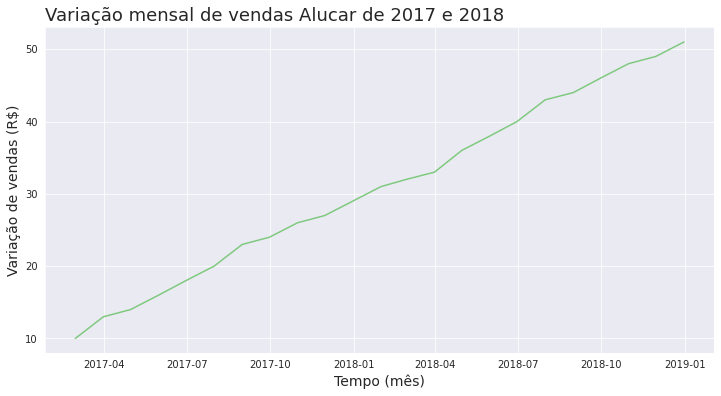

In [ ]:
#Visualizando a variação mensal das vendas de 2017 e 2018
plotar_grafico_configurado(
    'Grafico de vendas (mes)',
    'Variação mensal de vendas Alucar de 2017 e 2018',
    'Tempo (mês)',
    'Variação de vendas (R$)',
    'mes',
    'variacao_mensal',
    alucar)

In [ ]:
alucar['aceleracao'] = alucar['variacao_mensal'].diff()
alucar

,mes,vendas,variacao_mensal,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


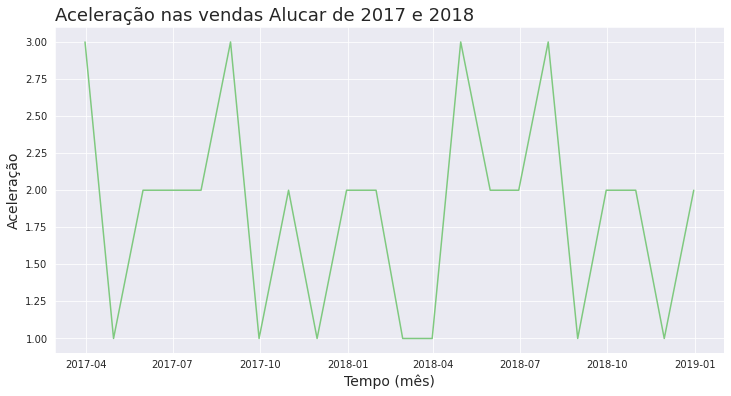

In [ ]:
#Visualizando a aceleração nas vendas de 2017 e 2018
plotar_grafico_configurado(
    'Grafico de aceleração nas vendas (mes)',
    'Aceleração nas vendas Alucar de 2017 e 2018',
    'Tempo (mês)',
    'Aceleração',
    'mes',
    'aceleracao',
    alucar)

Em momento algum vemos uma aceleração negativa ou zerada.

In [ ]:
#Criar uma função para fazer gráficos comparativos

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize=18, loc='left')
  sns.lineplot(x = x, y = y1, data = dataset)
  ax.labelx = y1
  plt.subplot(3,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  ax.labelx = y2
  plt.subplot(3,1,3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax.labelx = y3
  ax = ax

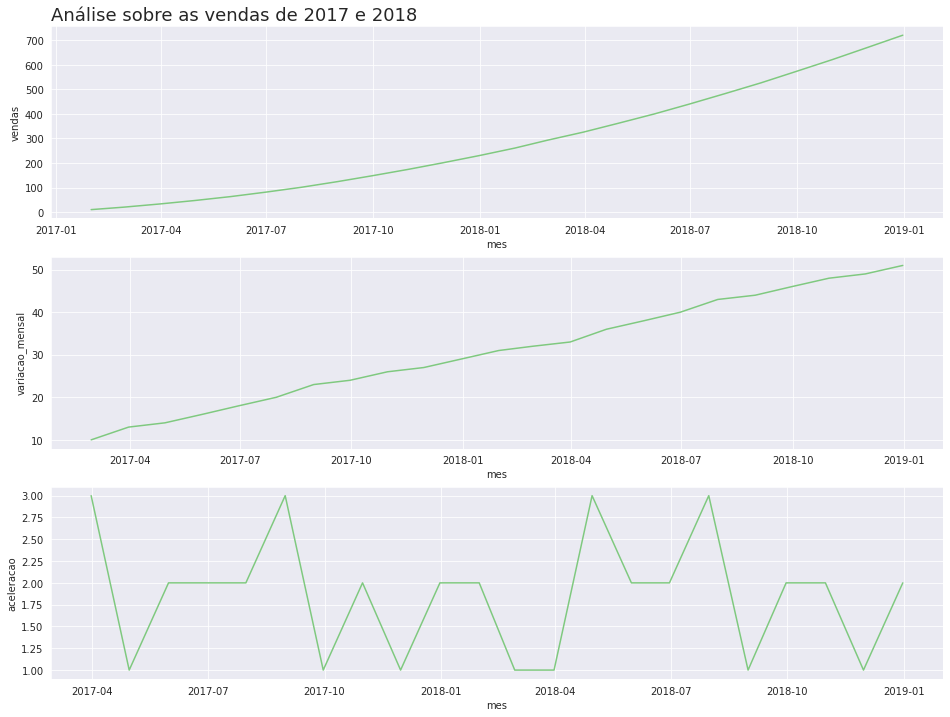

In [ ]:
#Testando a função plot_comparacao
plot_comparacao('mes','vendas','variacao_mensal','aceleracao',alucar,'Análise sobre as vendas de 2017 e 2018')

Tudo pronto, basta aplicar em outras análises.

#Autocorrelação entre os dados de vendas

In [ ]:
#importando uma biblioteca para calcular correlações

from pandas.plotting import autocorrelation_plot

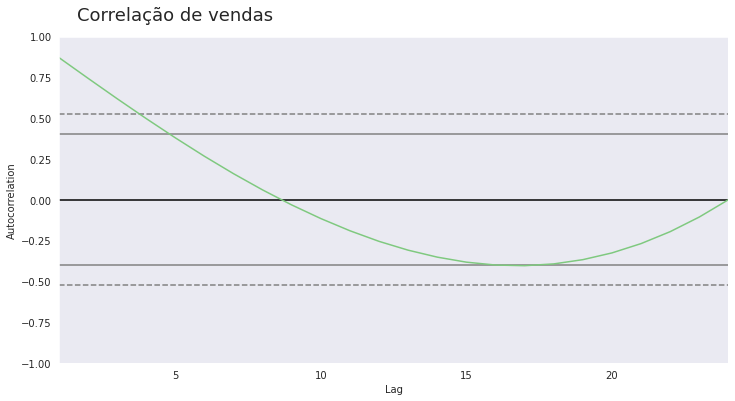

In [ ]:
#Compreendendo as vendas em x2 (período atual) se relacionam com x1 (período anterior)
grafico_correlacao = plt.figure(figsize = (12,6))
grafico_correlacao.suptitle('Correlação de vendas', fontsize = 18, x = 0.26, y = 0.95)
grafico_correlacao = autocorrelation_plot(alucar['vendas'])
grafico_correlacao = grafico_correlacao

Os 7 primeiros dias possuem uma correlação muito forte com seus respectivos dias anteriores. Com o passar do tempo, essa tendência se desfaz.

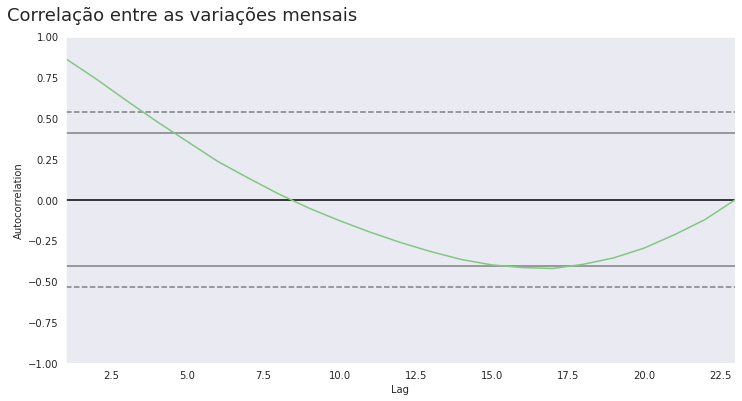

In [ ]:
#Compreendendo com as variações em x2 (período atual) se relacionam com x1 (período anterior)
grafico_correlacao_variacao = plt.figure(figsize = (12,6))
grafico_correlacao_variacao.suptitle('Correlação entre as variações mensais', fontsize = 18, x = 0.26, y = 0.95)
grafico_correlacao_variacao = autocorrelation_plot(alucar['variacao_mensal'][1:])
grafico_correlacao_variacao = grafico_correlacao_variacao

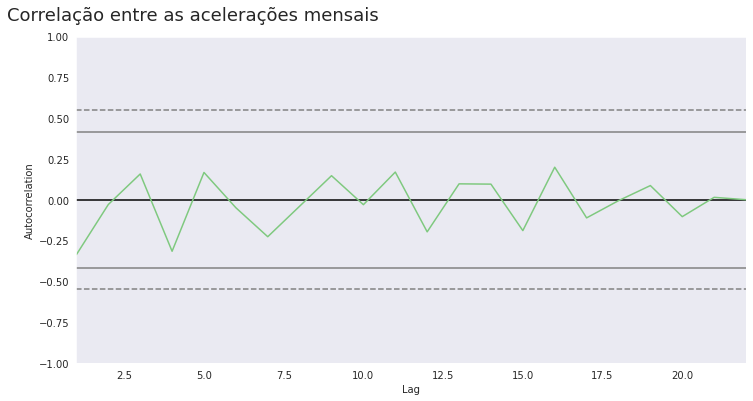

In [ ]:
#Compreendendo com as acelerações em x2 (período atual) se relacionam com x1 (período anterior)
grafico_correlacao_aceleracao = plt.figure(figsize = (12,6))
grafico_correlacao_aceleracao.suptitle('Correlação entre as acelerações mensais', fontsize = 18, x = 0.26, y = 0.95)
grafico_correlacao_aceleracao = autocorrelation_plot(alucar['aceleracao'][2:])
grafico_correlacao_aceleracao = grafico_correlacao_aceleracao

#Alucar - Analisando assinantes da Newsletter

##Informações sobre a base de dados utilizada

In [ ]:
#Carregando a base de dados
assinantes = pd.read_csv('/content/drive/MyDrive/Base de dados/Alucar/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
#Análise dos tipos de dados
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
#Imprimindo informações sobre a base de dados
print('Informações sobre a base de dados utilizada:\n')
print('O número de linhas é:',assinantes.shape[0])
print('O número de colunas é:',assinantes.shape[1])
print('\nA quantidade de dados nulos na base de dados é de:',assinantes.isna().sum().sum())

Informações sobre a base de dados utilizada:

O número de linhas é: 24
O número de colunas é: 2

A quantidade de dados nulos na base de dados é de: 0


##Conversão de dados

In [ ]:
#Convertendo a data (object) para formato data
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

##Criando colunas adicionais (variação mensal e aceleração mensal)

In [ ]:
assinantes['variacao_mensal'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['variacao_mensal'].diff()
assinantes

,mes,assinantes,variacao_mensal,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


##Primeiros gráficos

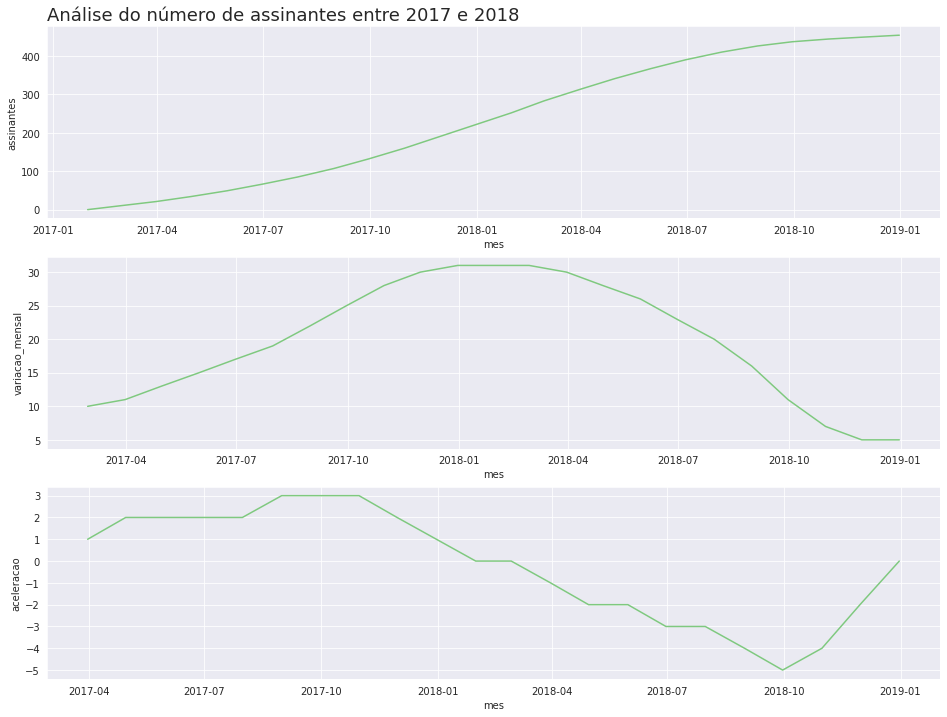

In [ ]:
#Criando gráficos com a função plot_comparacao() definida anteriormente
plot_comparacao(
    'mes',
    'assinantes',
    'variacao_mensal',
    'aceleracao',
    assinantes,
    'Análise do número de assinantes entre 2017 e 2018'
    )

**Gráfico 1:** O número de assinantes está em uma tendência de crescimento.</br>
**Gráfico 2:** A quantidade de novas assinaturas mensais é positiva, mas não é crescente.</br>
**Gráfico 3:** Pode-se notar que entre os meses 01 e 04 de 2018, a taxa de crescimento de novos assinantes é negativa.
